In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
data= pd.read_csv('/content/refined_loan_approval_dataset.csv')
print(data)

      loan_id  no_of_dependents  education  self_employed  income_annum  \
0           1                 2          0              0       9600000   
1           2                 0          1              1       4100000   
2           3                 3          0              0       9100000   
3           4                 3          0              0       8200000   
4           5                 5          1              1       9800000   
...       ...               ...        ...            ...           ...   
4264     4265                 5          0              1       1000000   
4265     4266                 0          1              1       3300000   
4266     4267                 2          1              0       6500000   
4267     4268                 1          1              0       4100000   
4268     4269                 1          0              0       9200000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0        29900000         12

In [119]:
data_final= data.drop(['loan_id'],axis=1)
print(data_final)

      no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                    2          0              0       9600000     29900000   
1                    0          1              1       4100000     12200000   
2                    3          0              0       9100000     29700000   
3                    3          0              0       8200000     30700000   
4                    5          1              1       9800000     24200000   
...                ...        ...            ...           ...          ...   
4264                 5          0              1       1000000      2300000   
4265                 0          1              1       3300000     11300000   
4266                 2          1              0       6500000     23900000   
4267                 1          1              0       4100000     12800000   
4268                 1          0              0       9200000     29700000   

      loan_term  cibil_score  residential_assets_va

In [120]:
# Add this line to clean up the column names
data_final.columns = data_final.columns.str.strip()

# Your original code will now work
data_final[['no_of_dependents', 'education', 'self_employed', 'income_annum',
            'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
            'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
            'loan_status']] = data_final[['no_of_dependents', 'education', 'self_employed',
                                         'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                                         'residential_assets_value', 'commercial_assets_value',
                                         'luxury_assets_value', 'bank_asset_value',
                                         'loan_status']].replace(0,np.nan)

print(data_final)

      no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                  2.0        NaN            NaN       9600000     29900000   
1                  NaN        1.0            1.0       4100000     12200000   
2                  3.0        NaN            NaN       9100000     29700000   
3                  3.0        NaN            NaN       8200000     30700000   
4                  5.0        1.0            1.0       9800000     24200000   
...                ...        ...            ...           ...          ...   
4264               5.0        NaN            1.0       1000000      2300000   
4265               NaN        1.0            1.0       3300000     11300000   
4266               2.0        1.0            NaN       6500000     23900000   
4267               1.0        1.0            NaN       4100000     12800000   
4268               1.0        NaN            NaN       9200000     29700000   

      loan_term  cibil_score  residential_assets_va

<Axes: >

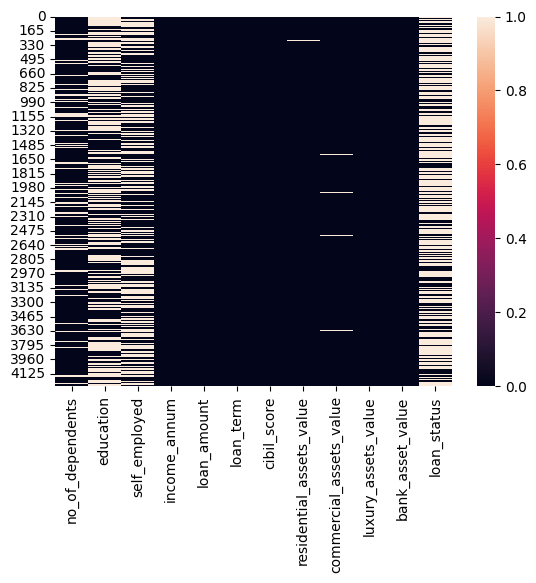

In [121]:
sns.heatmap(data_final.isnull())

In [122]:
data_final.fillna({'commercial_assets_value':data_final['commercial_assets_value'].mode()[0]},inplace=True)
data_final.fillna({'residential_assets_value':data_final['residential_assets_value'].mode()[0]},inplace=True)
data_final.fillna({'no_of_dependents':data_final['no_of_dependents'].mode()[0]},inplace=True)
data_final.fillna({'education':data_final['education'].mode()[0]},inplace=True)
data_final.fillna({'self_employed':data_final['self_employed'].mode()[0]},inplace=True)
data_final.fillna({'loan_status':data_final['loan_status'].mode()[0]},inplace=True)

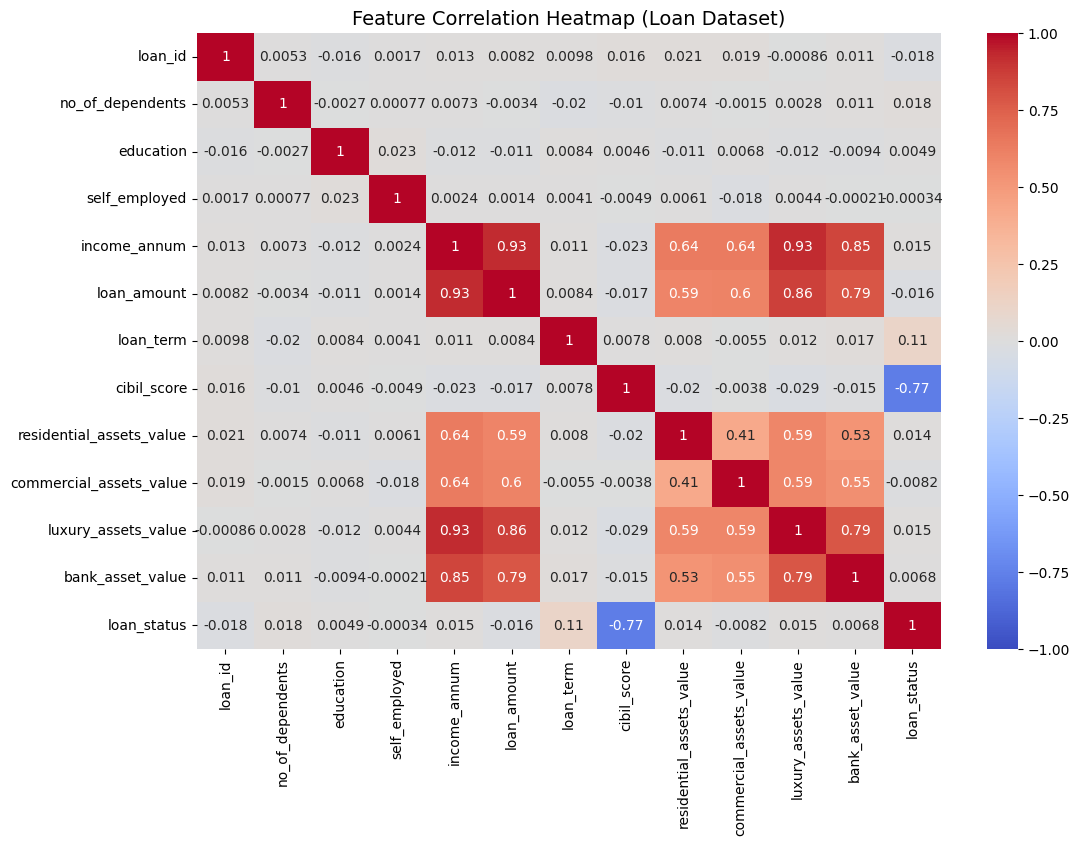

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv("/content/refined_loan_approval_dataset.csv")

# Encode categorical columns (so they become numeric)
df_encoded = df.copy()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

# Create correlation matrix
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap (Loan Dataset)", fontsize=14)
plt.show()


/tmp/ipython-input-648495883.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")


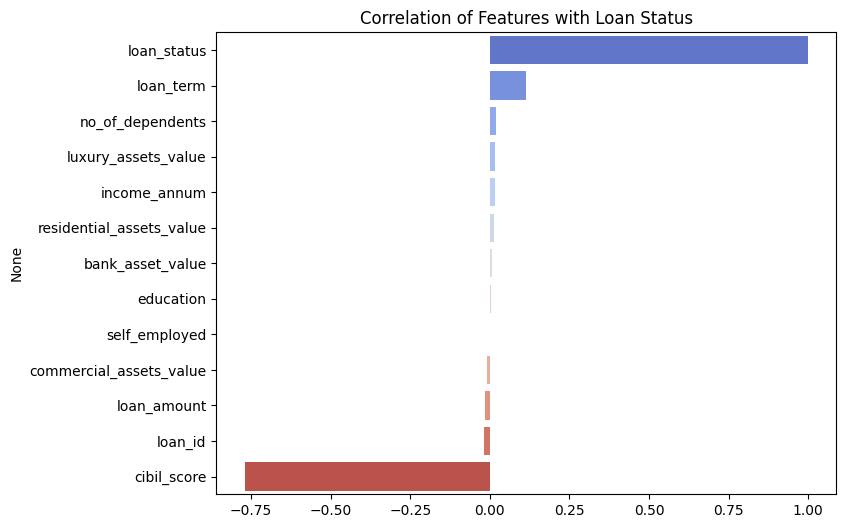

In [124]:
# Correlation with target variable
target_corr = corr_matrix["loan_status"].sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")
plt.title("Correlation of Features with Loan Status")
plt.show()


<Axes: >

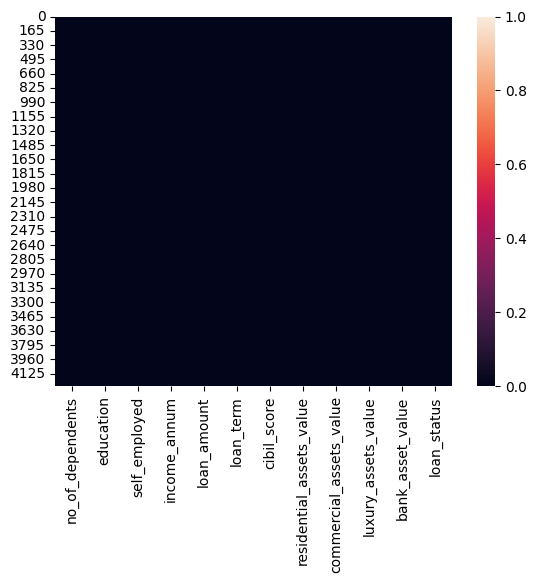

In [125]:
sns.heatmap(data_final.isnull())

In [126]:
print(data.head())
print(data.isnull().sum())

   loan_id  no_of_dependents  education  self_employed  income_annum  \
0        1                 2          0              0       9600000   
1        2                 0          1              1       4100000   
2        3                 3          0              0       9100000   
3        4                 3          0              0       8200000   
4        5                 5          1              1       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value  loan_status  
0                 17600000             22700000           8000000            

In [127]:
data = pd.get_dummies(data, columns=['education', 'self_employed'], drop_first=True)

In [128]:
import numpy as np
correlation_matrix = data.corr()

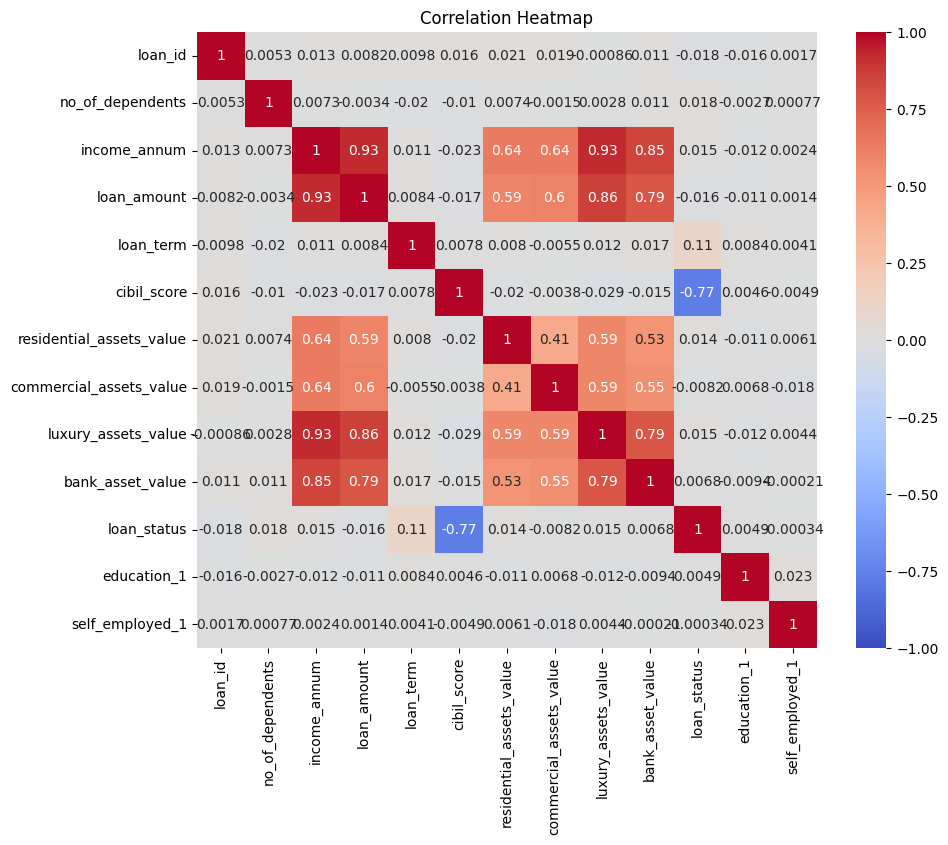

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [130]:
X = data.drop('loan_status', axis=1)  # Features
y = data['loan_status']  # Target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [132]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [133]:
# Re-load the original data to avoid issues with previous data wrangling
data = pd.read_csv('/content/refined_loan_approval_dataset.csv')

# Perform one-hot encoding on categorical features
data_encoded = pd.get_dummies(data, columns=['education', 'self_employed'], drop_first=True)

# Define features (X) and target (y)
X = data_encoded.drop('loan_status', axis=1)  # Features
y = data_encoded['loan_status']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model with increased max_iter
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


In [134]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[492  44]
 [108 210]]

Accuracy Score:
0.8220140515222483

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       536
           1       0.83      0.66      0.73       318

    accuracy                           0.82       854
   macro avg       0.82      0.79      0.80       854
weighted avg       0.82      0.82      0.82       854



In [135]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [136]:
dt_pred=dt.predict(X_test)

In [137]:
acdt=accuracy_score(y_test,dt_pred)
print(acdt)

0.9754098360655737


<Axes: >

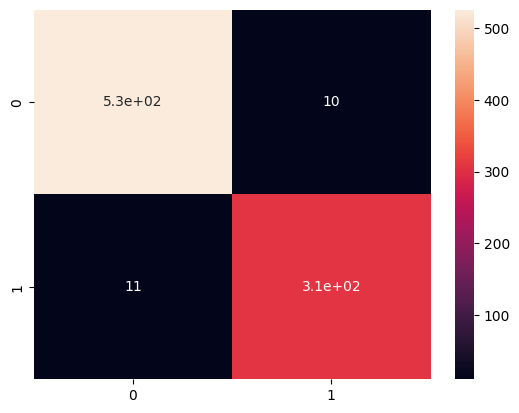

In [138]:
cmdt=confusion_matrix(y_test,dt_pred)
sns.heatmap(cmdt,annot=True)

In [139]:
crdt=classification_report(y_test,dt_pred)
print(crdt)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



In [140]:
from sklearn.svm import SVC
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

SVC(random_state=42)

In [141]:
svm_pred=svc.predict(X_test)

In [142]:
acsvm=accuracy_score(y_test,svm_pred)
print(acsvm)

0.6276346604215457


<Axes: >

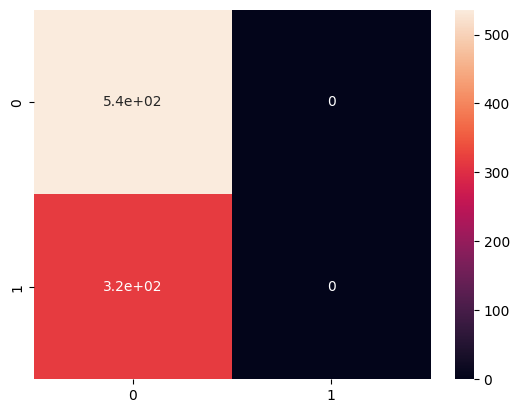

In [143]:
cmsvm=confusion_matrix(y_test,svm_pred)
sns.heatmap(cmsvm,annot=True)

In [144]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [145]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

<Axes: >

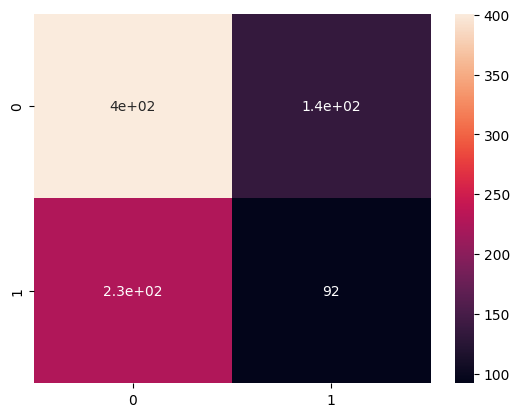

In [146]:
# Apply missing value imputation to X_train and X_test
X_train.fillna({'commercial_assets_value':X_train['commercial_assets_value'].mode()[0]},inplace=True)
X_train.fillna({'residential_assets_value':X_train['residential_assets_value'].mode()[0]},inplace=True)
X_train.fillna({'no_of_dependents':X_train['no_of_dependents'].mode()[0]},inplace=True)
# X_train.fillna({'education':X_train['education'].mode()[0]},inplace=True) # education is one-hot encoded
# X_train.fillna({'self_employed':X_train['self_employed'].mode()[0]},inplace=True) # self_employed is one-hot encoded


X_test.fillna({'commercial_assets_value':X_test['commercial_assets_value'].mode()[0]},inplace=True)
X_test.fillna({'residential_assets_value':X_test['residential_assets_value'].mode()[0]},inplace=True)
X_test.fillna({'no_of_dependents':X_test['no_of_dependents'].mode()[0]},inplace=True)
# X_test.fillna({'education':X_test['education'].mode()[0]},inplace=True) # education is one-hot encoded
# X_test.fillna({'self_employed':X_test['self_employed'].mode()[0]},inplace=True)


knn_pred=knn.predict(X_test)
cmknn=confusion_matrix(y_test,knn_pred)
sns.heatmap(cmknn,annot=True)

In [147]:
acknn=accuracy_score(y_test,knn_pred)
print(acknn)

0.5772833723653396


In [148]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [149]:
nb_pred=gnb.predict(X_test)

In [150]:
nbac=accuracy_score(y_test,nb_pred)
print(nbac)

0.7693208430913349


<Axes: >

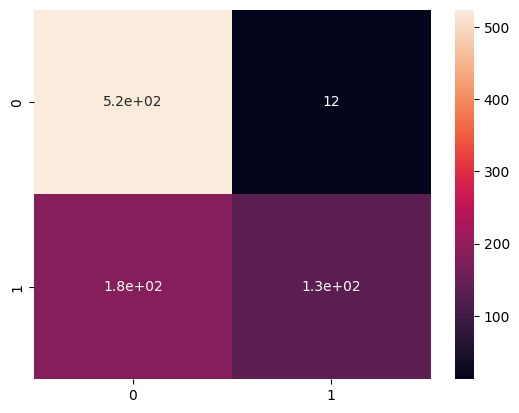

In [151]:
cmnb = confusion_matrix(y_test, nb_pred)
sns.heatmap(cmnb, annot=True)

In [152]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Example for LDA
y_pred_lda = lda.predict(X_test)
print("LDA Accuracy Score:", accuracy_score(y_test, y_pred_lda))
print("LDA Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lda))
print("LDA Classification Report:\n", classification_report(y_test, y_pred_lda))

LDA Accuracy Score: 0.9156908665105387
LDA Confusion Matrix:
 [[483  53]
 [ 19 299]]
LDA Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       536
           1       0.85      0.94      0.89       318

    accuracy                           0.92       854
   macro avg       0.91      0.92      0.91       854
weighted avg       0.92      0.92      0.92       854



In [153]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("LR Accuracy Score:", accuracy_score(y_test, y_pred_lr))
print("LR Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("LR Classification Report:\n", classification_report(y_test, y_pred_lr))

LR Accuracy Score: 0.8220140515222483
LR Confusion Matrix:
 [[492  44]
 [108 210]]
LR Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       536
           1       0.83      0.66      0.73       318

    accuracy                           0.82       854
   macro avg       0.82      0.79      0.80       854
weighted avg       0.82      0.82      0.82       854



In [154]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("DT Accuracy Score:", accuracy_score(y_test, y_pred_dt))
print("DT Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("DT Classification Report:\n", classification_report(y_test, y_pred_dt))

DT Accuracy Score: 0.9754098360655737
DT Confusion Matrix:
 [[526  10]
 [ 11 307]]
DT Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



In [155]:
from sklearn.svm import SVC
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("SVC Accuracy Score:", accuracy_score(y_test, y_pred_svc))
print("SVC Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))
print("SVC Classification Report:\n", classification_report(y_test, y_pred_svc))

SVC Accuracy Score: 0.6276346604215457
SVC Confusion Matrix:
 [[536   0]
 [318   0]]
SVC Classification Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       536
           1       0.00      0.00      0.00       318

    accuracy                           0.63       854
   macro avg       0.31      0.50      0.39       854
weighted avg       0.39      0.63      0.48       854



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [156]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy Score:", accuracy_score(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy Score: 0.5772833723653396
KNN Confusion Matrix:
 [[401 135]
 [226  92]]
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.75      0.69       536
           1       0.41      0.29      0.34       318

    accuracy                           0.58       854
   macro avg       0.52      0.52      0.51       854
weighted avg       0.55      0.58      0.56       854



In [157]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print("GNB Accuracy Score:", accuracy_score(y_test, y_pred_gnb))
print("GNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gnb))
print("GNB Classification Report:\n", classification_report(y_test, y_pred_gnb))

GNB Accuracy Score: 0.7693208430913349
GNB Confusion Matrix:
 [[524  12]
 [185 133]]
GNB Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.98      0.84       536
           1       0.92      0.42      0.57       318

    accuracy                           0.77       854
   macro avg       0.83      0.70      0.71       854
weighted avg       0.81      0.77      0.74       854



In [158]:
import joblib

# Save the Decision Tree model
joblib.dump(dt, 'decision_tree_model.joblib')

print("Decision Tree model saved successfully as 'decision_tree_model.joblib'")

Decision Tree model saved successfully as 'decision_tree_model.joblib'
